In [ ]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# # Restart your kernel after installing 
# !pip install joblib

In [ ]:
# !pip install xgboost

In [1]:
# Import the dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore', FutureWarning)
pd.set_option('mode.chained_assignment', None)

In [2]:
# Import the dependencies
from sklearn.metrics import plot_confusion_matrix

In [3]:
# import csv into a dataframe
data_read = pd.read_csv("../resources/fraudTrain.csv")
data_read.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data_read[(data_read.category=='grocery_pos') & (data_read.merchant=='fraud_Rutherford-Mertz')]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
10,10,2019-01-01 00:06:23,4642894980163,fraud_Rutherford-Mertz,grocery_pos,24.74,Eddie,Mendez,M,1831 Faith View Suite 653,...,40.7491,-95.0380,7297,IT trainer,1990-07-13,d71c95ab6b7356dd74389d41df429c87,1325376383,40.275891,-96.011548,0
217,217,2019-01-01 02:41:55,4171397999167005,fraud_Rutherford-Mertz,grocery_pos,88.67,Ashley,Mcdonald,F,3160 Tina Estates Suite 234,...,35.0296,-82.5136,5648,Museum/gallery exhibitions officer,1934-10-06,4f42b1646a63fdcaebcb26c44dbde781,1325385715,34.276436,-83.063945,0
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2475,2475,2019-01-02 01:51:11,36722699017270,fraud_Rutherford-Mertz,grocery_pos,215.74,Jessica,Perez,F,8172 Robertson Parkways Suite 072,...,33.2887,-111.0985,2872,Petroleum engineer,1987-10-28,c45df5f3ed30bda45352c3f82ef10248,1325469071,33.312490,-111.443804,0
2705,2705,2019-01-02 08:03:25,30153452207526,fraud_Rutherford-Mertz,grocery_pos,92.05,Robin,Smith,F,0537 Margaret Common Suite 526,...,31.8287,-99.4270,5908,Radio producer,1962-04-05,01734b93d79819a02bdb55c1117557ed,1325491405,31.930346,-100.268153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295700,1295700,2020-06-21 03:46:43,4003771737807706,fraud_Rutherford-Mertz,grocery_pos,120.59,Danielle,Hayden,F,03368 Michelle Trail,...,35.1791,-91.2594,37,"Lecturer, further education",1958-01-01,b2bb4c2f23a3c51e9b564c8b03670f08,1371786403,35.690793,-91.222471,0
1296076,1296076,2020-06-21 06:52:59,378278619832195,fraud_Rutherford-Mertz,grocery_pos,112.12,Mary,Mcintyre,F,77921 Costa Villages,...,44.0385,-123.0614,191096,"Scientist, physiological",1964-04-06,dc771b81a8caa328115ed6350438ad84,1371797579,43.157694,-123.501134,0
1296137,1296137,2020-06-21 07:23:29,4839615922685395,fraud_Rutherford-Mertz,grocery_pos,138.47,Phillip,Robertson,M,85344 Smith Gateway Apt. 280,...,39.0130,-86.5457,76,Social researcher,1955-05-06,7673eb9409f5c211e944de0ce4a19c8d,1371799409,39.253384,-85.659377,0
1296324,1296324,2020-06-21 09:06:45,4681601008538160,fraud_Rutherford-Mertz,grocery_pos,207.89,Tammy,Davis,F,77663 Colleen Freeway,...,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,259632ca07e421385d2e8da7ffe3e3b3,1371805605,40.866648,-81.650388,0


In [5]:
data_read.isnull().values.any()

False

# Up Sampling minority class

In [6]:
from sklearn.utils import resample

In [7]:
#separate majority and minority classes
df_majority = data_read[data_read.is_fraud==0]
df_minority = data_read[data_read.is_fraud==1]
print(df_majority.size)
print(df_minority.size)
data_read.is_fraud.value_counts()

29650887
172638


0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
# Upsample minority class
# nsamples = df_majority.is_fraud.count()

nsamples = round(df_majority.is_fraud.count()/2).astype(int)

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=nsamples,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled.is_fraud.value_counts()

1    644584
Name: is_fraud, dtype: int64

In [9]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69495,69495,2019-02-10 23:27:41,4669558618943766,fraud_Boyer-Reichert,shopping_net,980.79,Daniel,Hernandez,M,7340 Mcgrath Islands,...,41.1039,-72.3674,4299,Broadcast presenter,1968-10-26,e1929fa20733c22938029276c11d1d16,1328916461,41.924326,-72.787852,1
1133864,1133864,2020-04-17 13:51:50,30263540414123,"fraud_Streich, Dietrich and Barton",shopping_net,974.97,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,e26550509ff8bae768d25965f4459059,1366206710,37.589782,-111.710477,1
815199,815199,2019-12-07 23:56:59,4430881574719618,fraud_Schumm PLC,shopping_net,931.28,Alicia,Morales,F,4456 Dunn Roads,...,39.3199,-106.6596,61,Public relations account executive,1939-11-04,2fc589f78dd34f3c5462d53cfde79ff2,1354924619,38.511562,-106.994630,1
273012,273012,2019-05-15 02:28:13,3575540972310993,fraud_Luettgen PLC,gas_transport,6.81,Rachel,Villarreal,F,250 Carrie Throughway,...,34.3396,-89.5736,4198,Curator,2001-06-22,f489de72a73785fc366d7e81d5c055a3,1337048893,34.872931,-89.679913,1


In [10]:
df_upsampled.is_fraud.value_counts()

0    1289169
1     644584
Name: is_fraud, dtype: int64

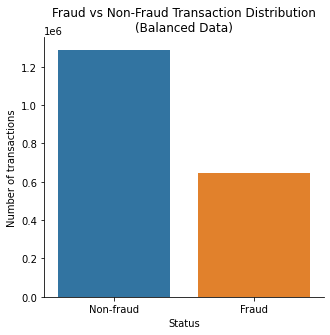

In [18]:
import seaborn as sns
fig = sns.catplot('is_fraud', data=df_upsampled, kind='count', height=4.5, aspect=1)
plt.title("Fraud vs Non-Fraud Transaction Distribution\n(Balanced Data)")
plt.savefig("../static/images/distribution_balanced.jpg", bbox_inches='tight')
plt.ylabel("Number of transactions")
plt.xlabel("Status")
fig.set_xticklabels(['Non-fraud', 'Fraud'])
plt.show()

In [11]:
# Convert the date of birth into numeric as age
data_train = df_upsampled
data_train['dob']= pd.to_datetime(data_train['dob'])
data_train['dob']

from datetime import datetime
today = datetime.today()
data_train['age'] = round(data_train['dob'].apply(lambda x: (today - x).days//365.25),0)
data_train['age']

0          32.0
1          42.0
2          59.0
3          54.0
4          34.0
           ... 
69495      52.0
1133864    59.0
815199     81.0
273012     19.0
531951     44.0
Name: age, Length: 1933753, dtype: float64

In [19]:
# Display the dataframe column names
data_train.columns

NameError: name 'data_train' is not defined

In [13]:
# Select the columns which are required for the further processing
data_train = data_train[["category", "cc_num", "amt", "lat","long", "job", "age", "trans_num", 
                         "unix_time", "merch_lat","merch_long", "is_fraud"]]
data_train.head()

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,misc_net,2703186189652095,4.97,36.0788,-81.1781,"Psychologist, counselling",32.0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,grocery_pos,630423337322,107.23,48.8878,-118.2105,Special educational needs teacher,42.0,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,entertainment,38859492057661,220.11,42.1808,-112.2620,Nature conservation officer,59.0,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,gas_transport,3534093764340240,45.00,46.2306,-112.1138,Patent attorney,54.0,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,misc_pos,375534208663984,41.96,38.4207,-79.4629,Dance movement psychotherapist,34.0,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### One Hot Encoding

In [14]:
# Encode the transaction number and convert into numeric
from sklearn.preprocessing import LabelEncoder

get_transnum = data_train['trans_num']
label_encoder = LabelEncoder()
label_encoder.fit(get_transnum)
encoded_transnum = label_encoder.transform(get_transnum)
data_train['trans_num'] = encoded_transnum

In [15]:
# Encode the category and convert into numeric
get_category = data_train['category']
label_encoder = LabelEncoder()
label_encoder.fit(get_category)
encoded_category = label_encoder.transform(get_category)
data_train['category'] = encoded_category

In [16]:
# Encode the job and convert into numeric
get_job = data_train['job']
label_encoder = LabelEncoder()
label_encoder.fit(get_job)
encoded_job = label_encoder.transform(get_job)
data_train['job'] = encoded_job

In [17]:
# sets y to is_fraud
target = data_train["is_fraud"].values.reshape(-1, 1)

# Define the features
selected_features = data_train.drop('is_fraud', axis=1)

In [18]:
selected_features

,category,cc_num,amt,lat,long,job,age,trans_num,unix_time,merch_lat,merch_long
0,8,2703186189652095,4.97,36.0788,-81.1781,370,32.0,56438,1325376018,36.011293,-82.048315
1,4,630423337322,107.23,48.8878,-118.2105,428,42.0,159395,1325376044,49.159047,-118.186462
2,0,38859492057661,220.11,42.1808,-112.2620,307,59.0,818703,1325376051,43.150704,-112.154481
3,2,3534093764340240,45.00,46.2306,-112.1138,328,54.0,544575,1325376076,47.034331,-112.561071
4,9,375534208663984,41.96,38.4207,-79.4629,116,34.0,831111,1325376186,38.674999,-78.632459
...,...,...,...,...,...,...,...,...,...,...,...
69495,11,4669558618943766,980.79,41.1039,-72.3674,52,52.0,1142762,1328916461,41.924326,-72.787852
1133864,11,30263540414123,974.97,37.7175,-112.4777,215,59.0,1146982,1366206710,37.589782,-111.710477
815199,11,4430881574719618,931.28,39.3199,-106.6596,378,81.0,241911,1354924619,38.511562,-106.994630
273012,2,3575540972310993,6.81,34.3396,-89.5736,114,19.0,1238805,1337048893,34.872931,-89.679913


## Split and Scale the data

In [19]:
# Import the dependecnies
from sklearn.model_selection import train_test_split

# Split the selected dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, random_state=42)

In [20]:
# Scale the train & test datasets
from sklearn.preprocessing import StandardScaler

# Create a standard scaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

# Transform the scaled data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Random Forest Classifier

In [21]:
# Use the Random Forest Classifier Model to get the feature importance/weightage
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the random forest model to X and y
rf = rf.fit(X_train_scaled, y_train)

# Return the importance of each column to predicting the outcomes
importances = rf.feature_importances_
importances

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([0.12589675, 0.01509127, 0.71108755, 0.01481087, 0.01402252,
       0.01605979, 0.02265291, 0.01435114, 0.0325722 , 0.016489  ,
       0.01696599])

In [22]:
# Sort each column in order of importance
rf_weights = sorted(zip(importances, selected_features.keys()), reverse=True)
rf_weights

[(0.7110875520099444, 'amt'),
 (0.12589674611067903, 'category'),
 (0.03257219744551543, 'unix_time'),
 (0.022652912476942105, 'age'),
 (0.01696599117304863, 'merch_long'),
 (0.0164890048725932, 'merch_lat'),
 (0.01605979004498013, 'job'),
 (0.01509126859563907, 'cc_num'),
 (0.014810872321192997, 'lat'),
 (0.014351143264190278, 'trans_num'),
 (0.014022521685274757, 'long')]

In [23]:
# Convert the weighted feature list into a dataframe
rf_weighted_df = pd.DataFrame(rf_weights)
rf_weighted_df

,0,1
0,0.711088,amt
1,0.125897,category
2,0.032572,unix_time
3,0.022653,age
4,0.016966,merch_long
5,0.016489,merch_lat
6,0.016060,job
7,0.015091,cc_num
8,0.014811,lat
9,0.014351,trans_num


In [24]:
# Save the dataframe into a csv file for plotting
rf_weighted_df.to_csv("../exporteddata/random_forest_balanced.csv")

In [25]:
### Plot the random forest features

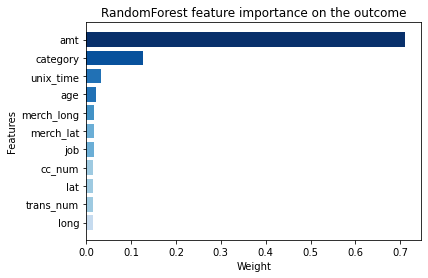

In [26]:
colors = ['#c6dbef','#9ecae1','#9ecae1','#9ecae1','#6baed6','#6baed6','#4292c6','#2171b5','#2171b5','#08519c','#08306b','#023858']
sorted_idx = importances.argsort()
# plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=['#FFFFCC',#D9F0A3','#ADDD8E','#78C679','#31A354','#006837'])
plt.barh(selected_features.columns[sorted_idx], importances[sorted_idx], color=colors)

plt.title("RandomForest feature importance on the outcome")
plt.ylabel("Features")
plt.xlabel("Weight")
plt.savefig("../static/images/randomforest_balanced.jpg",  bbox_inches='tight')
plt.show()

### Plot the histogram for the most weighted feature, Amount

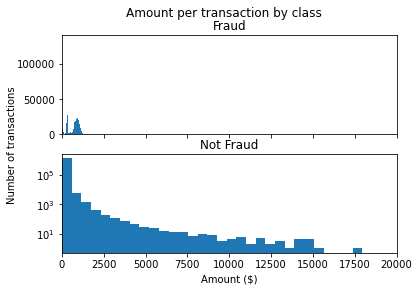

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

data_notfraud = data_train[data_train.is_fraud==0]
data_fraud = data_train[data_train.is_fraud==1]

bins = 50

ax1.hist(data_fraud.amt, bins = bins)
ax1.set_title('Fraud')
# ax1.set_ylabel('Number of Transactions')

ax2.hist(data_notfraud.amt, bins = bins)
ax2.set_title('Not Fraud')
# ax2.set_ylabel('Number of Transactions')

plt.xlabel('Amount ($)')
f.text(.01, .5, 'Number of transactions', ha='center', va='center', rotation='vertical')

plt.xlim((0, 20000))
plt.yscale('log')
plt.savefig("../static/images/histogram_balanced.jpg", bbox_inches='tight')
plt.show();

### Correlation Diagram

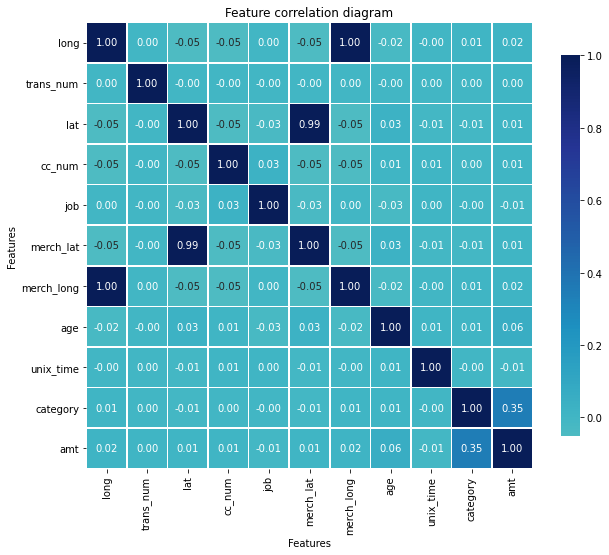

In [28]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.title("Feature correlation diagram")
    plt.xlabel("Features")
    plt.ylabel("Features")
    plt.savefig("../static/images/correlation_balanced.jpg", bbox_inches='tight')
    plt.show();

correlation_heatmap(X_train[selected_features.columns[sorted_idx]])


## Logistic Regression

In [29]:
# Import the dependencies for logistic regression model
from sklearn import set_config
from sklearn.linear_model import LogisticRegression

In [30]:
# Define logisitic regression model
logistic_regn_model = LogisticRegression()
set_config(print_changed_only=False)
print(logistic_regn_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [31]:
# Train the data with the logisitic regression model
logistic_regn_model.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
# Print the training score for training and testing datasets
print(f"Training Data Score: {logistic_regn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8951116792639388
Testing Data Score: 0.8948305784183733


In [33]:
# Make predictions with the test data
lr_predictions = logistic_regn_model.predict(X_test_scaled)
print(f"First 10 Predictions:   {lr_predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
print( np.unique(lr_predictions) )

First 10 Predictions:   [0 1 0 0 0 1 1 1 0 0]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]
[0 1]


## Hyper-Parameter Tuning

Using GridSearch to perform hyper-parameter tuning

In [39]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 15], 
              'penalty': ['l1', 'l2', 'elasticnet'] }
grid = GridSearchCV(logistic_regn_model, param_grid, verbose=3)

In [40]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 o

[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.1s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.896, total=   3.5s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.895, total=   2.6s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.895, total=   3.3s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.894, total=   3.7s
[CV] C=1, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=1, penalty=l2, score=0.896, total=   3.5s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=1, penalty=elasticnet .........................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=1, penalty=elasticnet .........................................
[CV] ............... C=1, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l1 .................................................
[CV] ....................... C=5, penalty=l1, score=nan, total=   0.1s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.896, total=   3.6s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.895, total=   2.7s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.895, total=   3.6s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.894, total=   4.2s
[CV] C=5, penalty=l2 .................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ..................... C=5, penalty=l2, score=0.896, total=   4.3s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=5, penalty=elasticnet .........................................
[CV] ............... C=5, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l1 ................................................
[CV] ...................... C=10, penalty=l1, score=nan, total=   0.1s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.896, total=   4.5s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.895, total=   3.1s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.895, total=   4.0s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.894, total=   4.4s
[CV] C=10, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=10, penalty=l2, score=0.896, total=   4.1s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=10, penalty=elasticnet ........................................
[CV] .............. C=10, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.1s


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.1s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.1s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.1s
[CV] C=15, penalty=l1 ................................................
[CV] ...................... C=15, penalty=l1, score=nan, total=   0.1s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.896, total=   4.2s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.895, total=   3.3s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.895, total=   4.1s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.894, total=   4.5s
[CV] C=15, penalty=l2 ................................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .................... C=15, penalty=l2, score=0.896, total=   4.0s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=elasticnet ........................................


C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s
[CV] C=15, penalty=elasticnet ........................................
[CV] .............. C=15, penalty=elasticnet, score=nan, total=   0.1s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.3min finished
C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 15],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [41]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.8951702877495118


In [42]:
predictions = grid.predict(X_test_scaled)

In [43]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

Test Acc: 0.895


### Gradient Boosting Regressor model

In [32]:
# fitting Gradient Boosting Regressor model to see accuracy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor(alpha=.01).fit(X_train_scaled, y_train)
predictions = gradient.predict(X_test_scaled)

MSE = mean_squared_error(y_test, predictions)
r2 = gradient.score(X_test_scaled, y_test)
print(f"MSE: {MSE}, R2: {r2}")

print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MSE: 0.035588017121760886, R2: 0.8399702735845194
First 10 Predictions:   [ 0.05787763  0.98584538 -0.08632718  0.00945683  0.04106173  0.97795089
  0.98135387  0.9924636   0.1068536  -0.00180235]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]


In [33]:
print(predictions)

[ 0.05787763  0.98584538 -0.08632718 ...  0.05222032 -0.01405171
  0.98634786]


### XGBoost Model

In [34]:
from xgboost import XGBRegressor

In [35]:
xgb = XGBRegressor(n_estimators=20)
xgb.fit(X_train_scaled, y_train)
xgb.feature_importances_

array([0.21783118, 0.01050533, 0.6531939 , 0.00975552, 0.01075631,
       0.01399496, 0.04247307, 0.01069474, 0.01255759, 0.00878168,
       0.00945573], dtype=float32)

In [36]:
xgb_weights = sorted(zip(xgb.feature_importances_, selected_features.keys()), reverse=True)

In [37]:
xgb_df = pd.DataFrame(xgb_weights)
xgb_df.to_csv("../exporteddata/xgboost_features_balanced.csv")

<function matplotlib.pyplot.show(*args, **kw)>

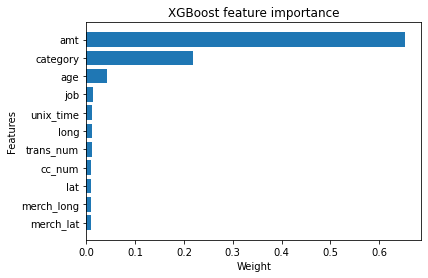

In [38]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(selected_features.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.title("XGBoost feature importance")
plt.xlabel("Weight")
plt.ylabel("Features")
plt.savefig("../static/images/xgb_balanced.jpg", bbox_inches='tight')
plt.show

### Gaussian Naïve Bayes Model

In [49]:
from sklearn.naive_bayes import GaussianNB 
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
gnb_prediction = gnb_model.predict(X_test_scaled)

C:\ProgramData\Anaconda3\envs\P36\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [50]:
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, gnb_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 82.96082856368642


In [51]:
print(f"First 10 Predictions:   {gnb_prediction[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 1 0 0]
First 10 Actual labels: [[0], [1], [0], [0], [0], [1], [1], [1], [0], [0]]


In [54]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 5, 10, 15], 
#               'penalty': ['l1', 'l2', 'elasticnet'] }
param_grid = {priors=None, var_smoothing=1e-09}
grid = GridSearchCV(gnb_model, param_grid, verbose=3)

SyntaxError: invalid syntax (<ipython-input-54-b7970478ef85>, line 5)

In [53]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1, penalty=l1 .................................................


ValueError: Invalid parameter C for estimator GaussianNB(priors=None, var_smoothing=1e-09). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
predictions = grid.predict(X_test_scaled)

print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [43]:
# Confusion Matrix for Gaussian Naive Bayes Model
metrics.confusion_matrix(gnb_prediction, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, gnb_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  316193
False Positives:  5865
False Negatives:  76493
True Positives:  84888


In [44]:
# Confusion Matrix for Logistic Regression Model
lr_predicted = logistic_regn_model.predict(X_test_scaled)
cf_matrix = metrics.confusion_matrix(lr_predicted, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, lr_predicted).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  315773
False Positives:  6285
False Negatives:  44584
True Positives:  116797


In [45]:
import seaborn as sns

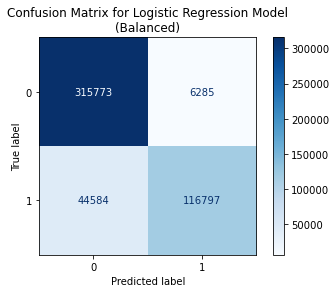

In [46]:
# Plot the confusion matrix chart
class_names =["0","1"]
plot_confusion_matrix(logistic_regn_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression Model\n(Balanced)")
plt.savefig("../static/images/cmatrix_logreg_balanced.jpg", bbox_inches='tight')
plt.show()

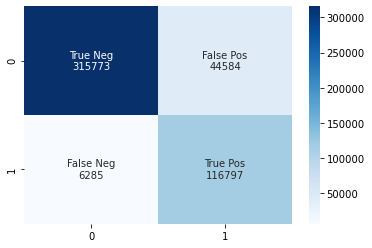

In [47]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# group_percentages = ["{0:.2%}".format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]


labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

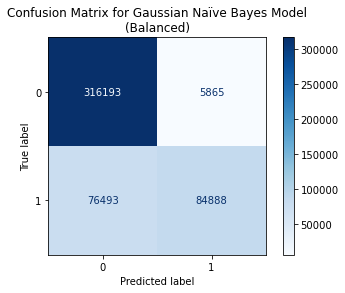

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
class_names =["0","1"]
# plt.figure()
plot_confusion_matrix(gnb_model, X_test_scaled, y_test,
                                 display_labels=class_names,cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Gaussian Naïve Bayes Model\n(Balanced)")
plt.savefig("../static/images/cmatrix_gnb_balanced.jpg",  bbox_inches='tight')
plt.show()

## Classification Report

In [49]:
from sklearn.metrics import classification_report

In [50]:
#Classification Report for Gaussian Naïve Bayes 
print(classification_report(y_test, gnb_prediction,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.81      0.98      0.88    322058
       Fraud       0.94      0.53      0.67    161381

    accuracy                           0.83    483439
   macro avg       0.87      0.75      0.78    483439
weighted avg       0.85      0.83      0.81    483439



In [51]:
#Classification Report for logisitc Regression Model
print(classification_report(y_test, lr_predictions,
                           target_names=['Genuine','Fraud']))

              precision    recall  f1-score   support

     Genuine       0.88      0.98      0.93    322058
       Fraud       0.95      0.72      0.82    161381

    accuracy                           0.89    483439
   macro avg       0.91      0.85      0.87    483439
weighted avg       0.90      0.89      0.89    483439



In [52]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = '../logistic_balanced_model.sav'
joblib.dump(logistic_regn_model, filename)


['../logistic_balanced_model.sav']

In [53]:
# save the best trained model- Logistic Regression Model for the flask app
import joblib
filename = 'gnb_balanced_model.sav'
joblib.dump(gnb_model, filename)

['gnb_balanced_model.sav']